In [1]:
import twint
import pandas as pd
import nest_asyncio  
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

#cleaning
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
# Sentiment Scoring
from textblob import TextBlob

In [13]:
df = pd.read_csv('tweets_data.csv', index_col=[0])

In [25]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Company,cleaned_tweet
0,1575998008491094016,1575998008491094016,1.664582e+12,2022-10-01 00:56:20,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...
1,1575997511759634434,1575997511759634434,1.664582e+12,2022-10-01 00:54:22,0,NaN,zara larsson chewed and spat out poster girl l...,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,zara larsson chewed and spat out poster girl l...
2,1575997238412980224,1575997238412980224,1.664582e+12,2022-10-01 00:53:16,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...
3,1575996936380764160,1575988601267290113,1.664582e+12,2022-10-01 00:52:04,0,NaN,@KhadeejahMalana good morning zara,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,good morning zara
4,1575996600228671489,1575996600228671489,1.664582e+12,2022-10-01 00:50:44,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136438 entries, 0 to 137035
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               136438 non-null  int64  
 1   conversation_id  136438 non-null  int64  
 2   created_at       136438 non-null  float64
 3   date             136438 non-null  object 
 4   timezone         136438 non-null  int64  
 5   place            120 non-null     object 
 6   tweet            136438 non-null  object 
 7   language         136438 non-null  object 
 8   hashtags         136438 non-null  object 
 9   cashtags         136438 non-null  object 
 10  user_id          136438 non-null  int64  
 11  user_id_str      136438 non-null  int64  
 12  username         136438 non-null  object 
 13  name             136435 non-null  object 
 14  day              136438 non-null  int64  
 15  hour             136438 non-null  int64  
 16  link             136438 non-null  obje

In [20]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Company', 'cleaned_tweet'],
      dtype='object')

In [24]:
df2df.dropna(how='all')

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Company,cleaned_tweet
0,1575998008491094016,1575998008491094016,1.664582e+12,2022-10-01 00:56:20,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...
1,1575997511759634434,1575997511759634434,1.664582e+12,2022-10-01 00:54:22,0,NaN,zara larsson chewed and spat out poster girl l...,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,zara larsson chewed and spat out poster girl l...
2,1575997238412980224,1575997238412980224,1.664582e+12,2022-10-01 00:53:16,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...
3,1575996936380764160,1575988601267290113,1.664582e+12,2022-10-01 00:52:04,0,NaN,@KhadeejahMalana good morning zara,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,good morning zara
4,1575996600228671489,1575996600228671489,1.664582e+12,2022-10-01 00:50:44,0,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Zara,check out this listing i just added to my clo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137031,1565135301705576448,1565135301705576448,1.661992e+12,2022-09-01 01:31:49,0,NaN,"Day after day, year after year, Ron just can't...",en,"['flyfishing', 'flyfish', 'limayriver', 'patag...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Patagonia,day after day year after year ron just cant ge...
137032,1565135071644119041,1565135071644119041,1.661992e+12,2022-09-01 01:30:54,0,NaN,So good I had to share! Check out all the item...,en,"['poshmark', 'fashion', 'style', 'shopmycloset...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Patagonia,so good i had to share check out all the items...
137033,1565134589429186560,1565134589429186560,1.661992e+12,2022-09-01 01:28:59,0,NaN,So good I had to share! Check out all the item...,en,"['poshmark', 'fashion', 'style', 'shopmycloset...",[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Patagonia,so good i had to share check out all the items...
137034,1565128341941899271,1565128341941899271,1.661991e+12,2022-09-01 01:04:10,0,NaN,Get ready for Patagonia. Few spaces remain for...,en,[],[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Patagonia,get ready for patagonia few spaces remain for ...


In [30]:
df = df.dropna(axis=1, how='all')

In [32]:
df = df.loc[:, (df != 0).any(axis=0)]

In [34]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'place', 'tweet',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search',
       'reply_to', 'Company', 'cleaned_tweet'],
      dtype='object')

In [35]:
print("Runnign sentiment process")
for row in df.itertuples():
    tweet = df.at[row[0], 'cleaned_tweet']
    analysis = TextBlob(tweet)
    
    df.at[row[0], 'polarity'] = analysis.sentiment[0]
    df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
    
    if analysis.sentiment[0]>0:
        df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        df.at[row[0], 'Sentiment'] = "Negative"
    else:
        df.at[row[0], 'Sentiment'] = "Neutral"

Runnign sentiment process


In [36]:
df

,id,conversation_id,created_at,date,place,tweet,language,hashtags,cashtags,user_id,...,nreplies,nretweets,quote_url,search,reply_to,Company,cleaned_tweet,polarity,subjectivity,Sentiment
0,1575998008491094016,1575998008491094016,1.664582e+12,2022-10-01 00:56:20,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],65103586,...,0,0,NaN,Zara OR ZARA OR zara,[],Zara,check out this listing i just added to my clo...,0.148182,0.497273,Positive
1,1575997511759634434,1575997511759634434,1.664582e+12,2022-10-01 00:54:22,NaN,zara larsson chewed and spat out poster girl l...,en,[],[],916751133808377856,...,0,0,NaN,Zara OR ZARA OR zara,[],Zara,zara larsson chewed and spat out poster girl l...,0.000000,0.000000,Neutral
2,1575997238412980224,1575997238412980224,1.664582e+12,2022-10-01 00:53:16,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],65103586,...,0,0,NaN,Zara OR ZARA OR zara,[],Zara,check out this listing i just added to my clo...,0.043232,0.475960,Positive
3,1575996936380764160,1575988601267290113,1.664582e+12,2022-10-01 00:52:04,NaN,@KhadeejahMalana good morning zara,en,[],[],1538732841181532160,...,0,0,NaN,Zara OR ZARA OR zara,[],Zara,good morning zara,0.700000,0.600000,Positive
4,1575996600228671489,1575996600228671489,1.664582e+12,2022-10-01 00:50:44,NaN,Check out this listing I just added to my #Pos...,en,"['poshmark', 'shopmycloset']",[],65103586,...,0,0,NaN,Zara OR ZARA OR zara,[],Zara,check out this listing i just added to my clo...,0.148182,0.497273,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137031,1565135301705576448,1565135301705576448,1.661992e+12,2022-09-01 01:31:49,NaN,"Day after day, year after year, Ron just can't...",en,"['flyfishing', 'flyfish', 'limayriver', 'patag...",[],966673043895468032,...,0,1,NaN,Patagonia OR patagonia OR PATAGONIA,[],Patagonia,day after day year after year ron just cant ge...,0.000000,0.500000,Neutral
137032,1565135071644119041,1565135071644119041,1.661992e+12,2022-09-01 01:30:54,NaN,So good I had to share! Check out all the item...,en,"['poshmark', 'fashion', 'style', 'shopmycloset...",[],233268743,...,0,0,NaN,Patagonia OR patagonia OR PATAGONIA,[],Patagonia,so good i had to share check out all the items...,0.650000,0.775000,Positive
137033,1565134589429186560,1565134589429186560,1.661992e+12,2022-09-01 01:28:59,NaN,So good I had to share! Check out all the item...,en,"['poshmark', 'fashion', 'style', 'shopmycloset...",[],25181286,...,0,0,NaN,Patagonia OR patagonia OR PATAGONIA,[],Patagonia,so good i had to share check out all the items...,0.650000,0.775000,Positive
137034,1565128341941899271,1565128341941899271,1.661991e+12,2022-09-01 01:04:10,NaN,Get ready for Patagonia. Few spaces remain for...,en,[],[],44832063,...,0,0,NaN,Patagonia OR patagonia OR PATAGONIA,[],Patagonia,get ready for patagonia few spaces remain for ...,0.000000,0.300000,Neutral


In [55]:
df.loc[df['nlikes'] > 10]

,id,conversation_id,created_at,place,tweet,language,hashtags,cashtags,user_id,user_id_str,...,nreplies,nretweets,quote_url,search,reply_to,Company,cleaned_tweet,polarity,subjectivity,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2022-09-01 01:13:48,1565130768925474818,1565130768925474818,1.661991e+12,NaN,Are they kidding ? Kate Moss doesn’t need Turd...,en,[],[],1460014038956625926,1460014038956625926,...,18,12,https://twitter.com/lovindepp/status/156511289...,Zara OR ZARA OR zara,[],Zara,are they kidding kate moss doesnt need turdme...,0.600000,1.000000,Positive
2022-09-01 02:10:41,1565145083749564416,1565145083749564416,1.661995e+12,NaN,📣 Ohmpawat schedule📣 L’Oreal Paris เติมไฮยาเ...,en,"['ohmpawat', 'ยิ้ม5พันของโอมภวัต']",[],1485300854102052873,1485300854102052873,...,0,57,NaN,Zara OR ZARA OR zara,[],Zara,ohmpawat schedule loreal paris young pm...,0.050000,0.325000,Positive
2022-09-01 02:16:39,1565146586077962240,1565146586077962240,1.661995e+12,NaN,Ohmpawat's schedule 🔴L’Oreal Paris เติมไฮยา...,en,"['ohmpawat', 'ยิ้ม5พันของโอมภวัต', 'lorealpari...",[],1534629576470630401,1534629576470630401,...,0,28,NaN,Zara OR ZARA OR zara,[],Zara,ohmpawat schedule loreal paris young t...,0.050000,0.325000,Positive
2022-09-01 02:57:05,1565156758808559622,1565156758808559622,1.661997e+12,NaN,🔴Last solo show was in Patagonia Chile at the ...,en,[],[],35308643,35308643,...,6,26,NaN,Patagonia OR patagonia OR PATAGONIA,[],Patagonia,last solo show was in patagonia chile at the b...,0.206250,0.412500,Positive
2022-09-01 03:01:52,1565157964733992966,1565152190213373953,1.661998e+12,NaN,@TorrensJonathan Patagonia’s W Trek in Chile d...,en,['torresdelpaine'],[],16790184,16790184,...,1,0,NaN,Patagonia OR patagonia OR PATAGONIA,"[{'screen_name': 'TorrensJonathan', 'name': 'J...",Patagonia,patagonias w trek in chile definitely ranked u...,0.000000,0.500000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01 00:30:00,1575991380551221249,1575991380551221249,1.664581e+12,NaN,"“if a man does not have sauce he is lost, but ...",en,[],[],1313529529,1313529529,...,1,0,NaN,Gucci OR GUCCI,[],Gucci,if a man does not have sauce he is lost but th...,0.000000,0.125000,Neutral
2022-10-01 00:35:26,1575992747500052480,1575992747500052480,1.664581e+12,NaN,it’s insane to me that a guy is worth $50 bill...,en,[],[],4726207589,4726207589,...,12,14,NaN,Zara OR ZARA OR zara,[],Zara,its insane to me that a guy is worth billion ...,-0.138095,0.545238,Negative
2022-10-01 00:38:54,1575993622490595328,1575993622490595328,1.664581e+12,NaN,I wish I knew more fuses in my daily life bc i...,en,[],[],1317872329028820992,1317872329028820992,...,1,2,NaN,Gucci OR GUCCI,[],Gucci,i wish i knew more fuses in my daily life bc i...,0.157143,0.207143,Positive


In [38]:
df.to_csv("data_with_sentiment.csv")

In [165]:
df = pd.read_csv('data_with_sentiment.csv', index_col=[0])

In [193]:
#Create rolling mean
df['date'] = pd.to_datetime(df["date"])
df = df.sort_values('date').set_index('date')

In [228]:
Zara_df = df[(df.Company=="Zara")]
Patagonia_df = df[(df.Company=="Patagonia")]
Gucci_df = df[(df.Company=="Gucci")]

In [229]:
pd.options.mode.chained_assignment = None 

Zara_df['mean'] = Zara_df['polarity'].expanding().mean()
Zara_df['rolling'] = Zara_df['polarity'].rolling("7d").mean()

Patagonia_df['mean'] = Patagonia_df['polarity'].expanding().mean()
Patagonia_df['rolling'] = Patagonia_df['polarity'].rolling("7d").mean()

Gucci_df['mean'] = Gucci_df['polarity'].expanding().mean()
Gucci_df['rolling'] = Gucci_df['polarity'].rolling("7d").mean()

In [239]:
df['mean'] = df['polarity'].expanding().mean()

In [210]:
df = df.loc[~df['cleaned_tweet'].str.contains('Mike|tindall|Larsson')]

In [167]:
df = df.loc[~df['hashtags'].str.contains('shopmycloset|poshmark')]

In [44]:
# Analysis and visualization
import ast #optional
from collections import Counter

import cufflinks as cf
from plotly.offline import init_notebook_mode #, plot, iplot, download_plotlyjs
init_notebook_mode(connected = True)
cf.go_offline()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [137]:
sns.set_theme()
pal = {"Zara":'r', "Gucci":'g',"Patagonia":"b"}

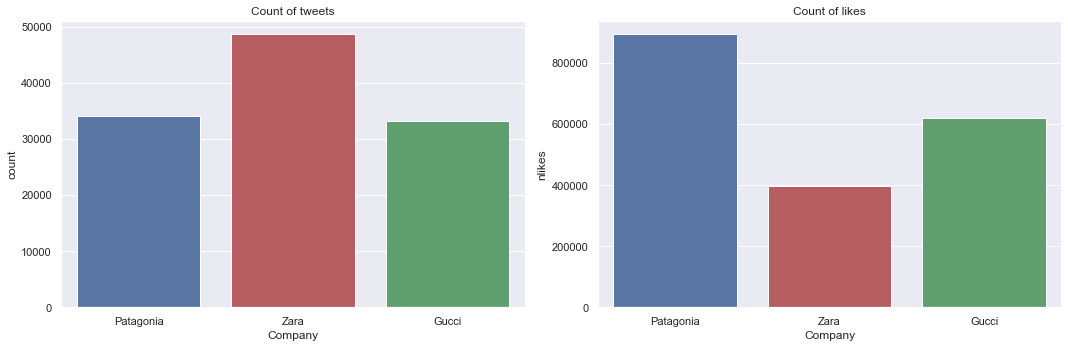

In [202]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(ax=ax[0], x=df["Company"], palette=pal)
ax[0].set_title("Count of tweets")

sns.barplot(data=df, x="Company", y="nlikes", estimator=np.sum, ci=None, palette=pal)
ax[1].set_title("Count of likes")

plt.tight_layout()
plt.show()

In [200]:
df[["cleaned_tweet","Company"]].groupby(["Company"]).count().transpose()

Company,Gucci,Patagonia,Zara
cleaned_tweet,33180,34019,48620


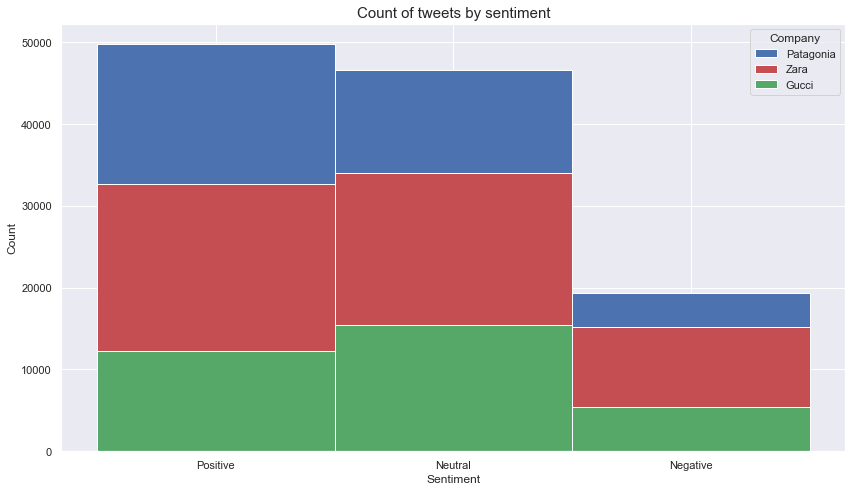

In [201]:
plt.figure(figsize=(12,7))
sns.histplot(df, x="Sentiment", hue="Company", palette= pal, multiple="stack", alpha = 1)
plt.title("Count of tweets by sentiment",fontsize =15)

plt.tight_layout()
plt.show()


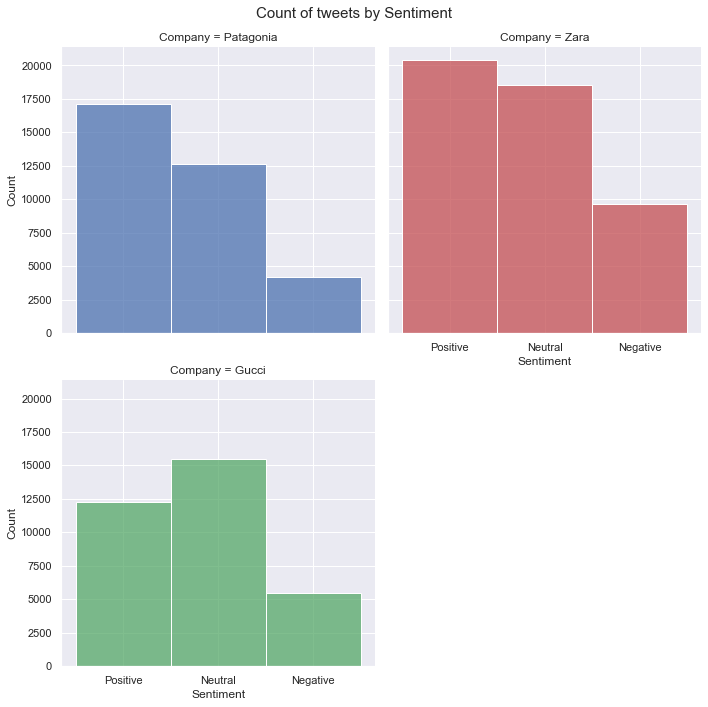

In [203]:
fig1 = sns.displot(df, x="Sentiment", col="Company", col_wrap= 2, hue="Company", legend=False, palette= pal)
fig1.fig.suptitle("Count of tweets by Sentiment",fontsize =15)

plt.tight_layout()
plt.show()


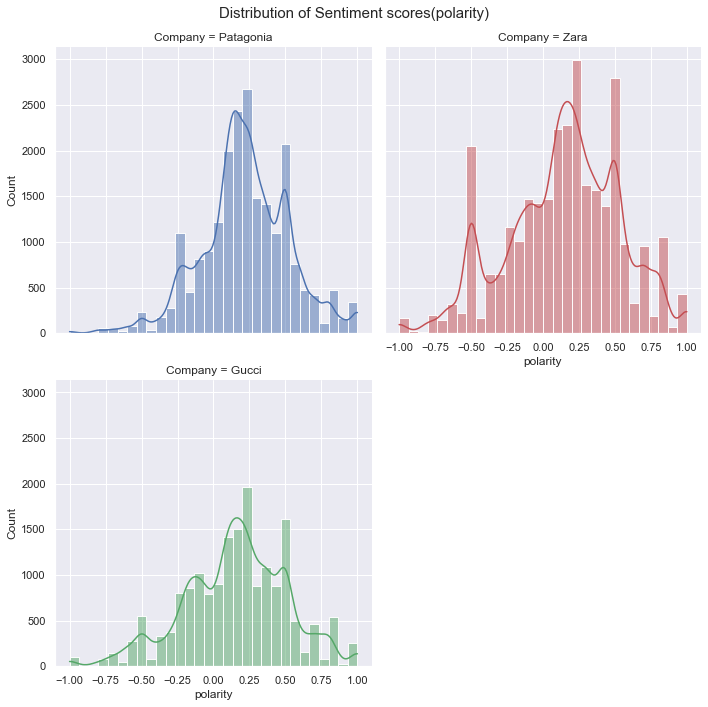

In [204]:
fig1 = sns.displot(data = df[~(df['polarity']==0)], x="polarity",
                   col="Company",
                   col_wrap= 2, 
                   hue="Company", 
                   legend=False, 
                   palette= pal,
                   kde = True,
                   bins =30)
fig1.fig.suptitle("Distribution of Sentiment scores(polarity)",fontsize =15 )

plt.tight_layout()
plt.show()

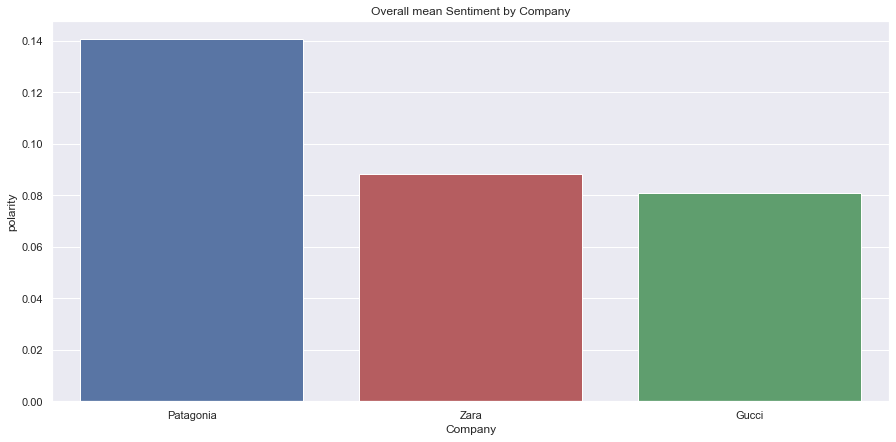

In [205]:
plt.figure(figsize=(15,7))
plt.title("Overall mean Sentiment by Company")
sns.barplot(data=df, x="Company",y="polarity", palette=pal, ci=False)
plt.show()

In [175]:
def hashlist(df):
    hashlist = []
    for i in df['hashtags']:
        hashlist.extend(ast.literal_eval(i))
    return hashlist

In [176]:
hash_Zara = pd.DataFrame(Counter(hashlist(Zara_df)).items()).sort_values(1,ascending=False)
hash_Gucci = pd.DataFrame(Counter(hashlist(Gucci_df)).items()).sort_values(1,ascending=False)
hash_Patagonia = pd.DataFrame(Counter(hashlist(Patagonia_df)).items()).sort_values(1,ascending=False)

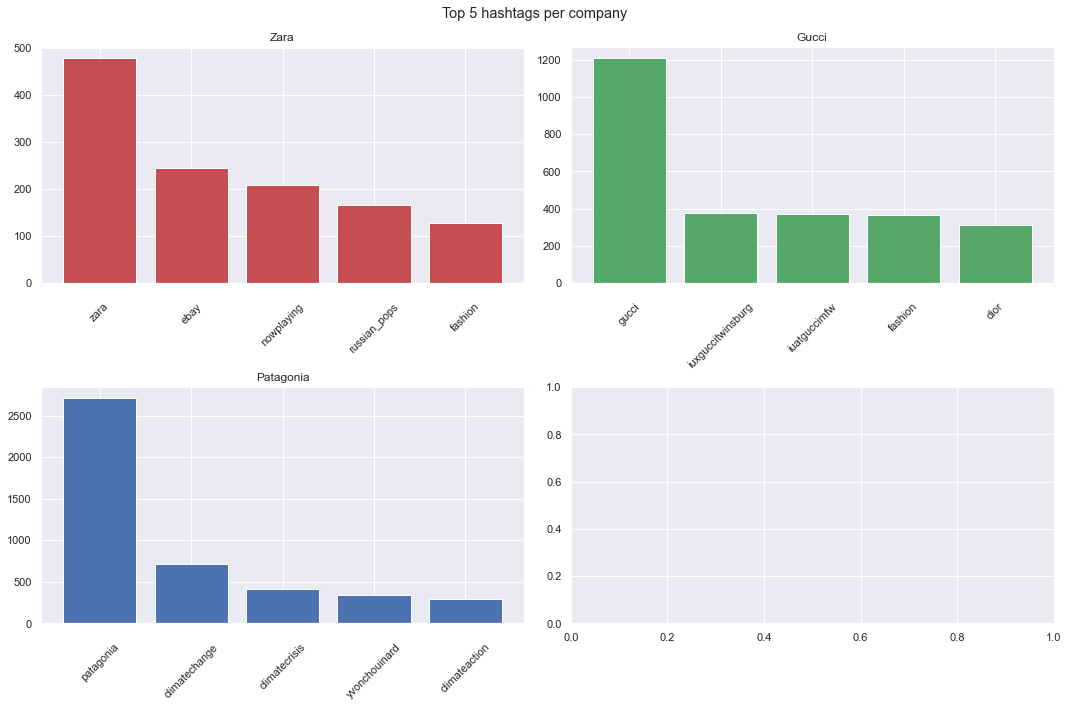

In [206]:
fig, ax = plt.subplots(2, 2,figsize=(15, 10))

plt.suptitle("Top 5 hashtags per company")


ax[0,0].bar(hash_Zara[0].head(), hash_Zara[1].head(), color = "r")
ax[0,0].set_title("Zara")
ax[0,0].xaxis.set_tick_params(rotation=45, size = 15)

ax[0,1].bar(hash_Gucci[0].head(), hash_Gucci[1].head(), color = "g")
ax[0,1].set_title("Gucci")
ax[0,1].xaxis.set_tick_params(rotation=45, size = 15)

ax[1,0].bar(hash_Patagonia[0].head(), hash_Patagonia[1].head(), color = "b")
ax[1,0].set_title("Patagonia")
ax[1,0].xaxis.set_tick_params(rotation=45, size = 15)

plt.tight_layout()
plt.show()

In [178]:
#ratio of negative tweets
Zara_df['Sentiment'].value_counts(normalize=True)

Positive    0.415127
Neutral     0.385498
Negative    0.199375
Name: Sentiment, dtype: float64

In [179]:
Patagonia_df['Sentiment'].value_counts(normalize=True)

Positive    0.503895
Neutral     0.372145
Negative    0.123960
Name: Sentiment, dtype: float64

In [180]:
Gucci_df['Sentiment'].value_counts(normalize=True)

Neutral     0.465521
Positive    0.369620
Negative    0.164858
Name: Sentiment, dtype: float64

In [212]:
tweetString_z = " ".join(list(Zara_df["cleaned_tweet"])).lower()
tweetString_g = " ".join(list(Gucci_df["cleaned_tweet"])).lower()
tweetString_p = " ".join(list(Patagonia_df["cleaned_tweet"])).lower()

In [85]:
from wordcloud import WordCloud

In [213]:
tweetString_z = re.sub(r"Zara|ZARA|amp","",tweetString_z)
wordcloud_z = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(tweetString_z)

tweetString_g = re.sub(r"Gucci|GUCCI|amp","",tweetString_g)   
wordcloud_g = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_g)

tweetString_p = re.sub(r"Patagonia|PATAGONIA|amp","",tweetString_p)     
wordcloud_p = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_p)


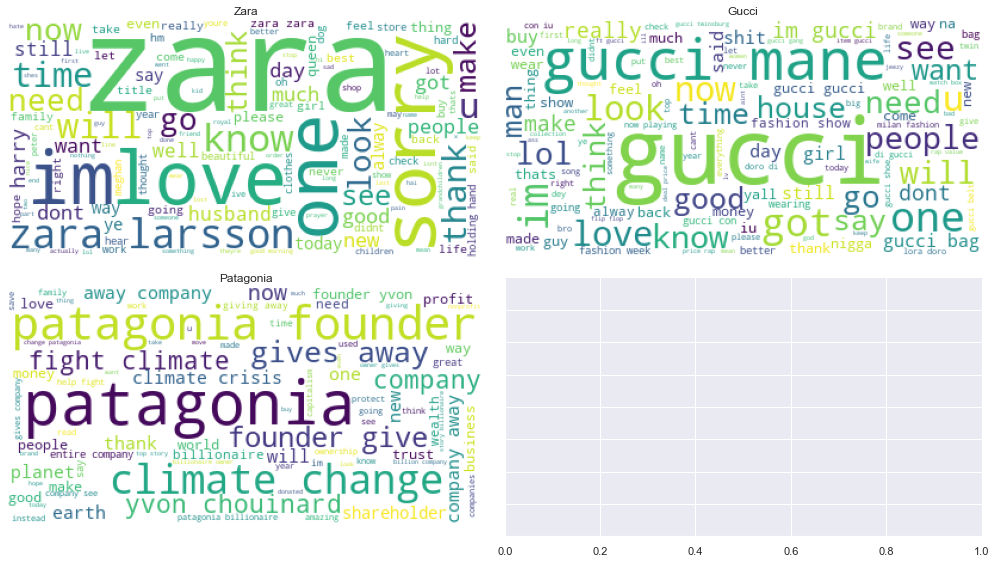

In [214]:
fig, ax = plt.subplots(2,2,figsize=(14, 8),sharey=True)

ax[0,0].imshow(wordcloud_z)
ax[0,1].imshow(wordcloud_g)
ax[1,0].imshow(wordcloud_p)


ax[0,0].axis("off")
ax[0,1].axis("off")
ax[1,0].axis("off")


ax[0,0].set_title("Zara")
ax[0,1].set_title("Gucci")
ax[1,0].set_title("Patagonia")


plt.tight_layout() 
plt.show()

In [240]:
df_neg = df.loc[df['Sentiment']=='Negative']

In [241]:
df_neg

,id,conversation_id,created_at,place,tweet,language,hashtags,cashtags,user_id,user_id_str,...,nretweets,quote_url,search,reply_to,Company,cleaned_tweet,polarity,subjectivity,Sentiment,mean
date,,,,,,,,,,,,,,,,,,,,,
2022-09-01 01:05:10,1565128596980731905,1565128596980731905,1.661991e+12,NaN,Under Tomorrow's Alleged Sky. I believe in my ...,en,"['cyberpunk', 'dystopian', 'scifi']",[],948132960909348864,948132960909348864,...,1,NaN,Zara OR ZARA OR zara,[],Zara,under tomorrow alleged sky i believe in my cit...,-0.100000,0.100000,Negative,0.298611
2022-09-01 01:13:47,1565130763066130435,1565130295526928385,1.661991e+12,NaN,@zara_ayy the people in mine will end up block...,en,[],[],927484721138929664,927484721138929664,...,0,NaN,Zara OR ZARA OR zara,"[{'screen_name': 'zara_ayy', 'name': 'z a r a'...",Zara,the people in mine will end up blocking me but...,-0.300000,0.400000,Negative,0.211859
2022-09-01 01:15:51,1565131285156200450,1565090215655804928,1.661991e+12,NaN,@Shedontkir Wild as shit. Zara never disappoin...,en,[],[],2214431719,2214431719,...,0,NaN,Zara OR ZARA OR zara,"[{'screen_name': 'Shedontkir', 'name': 'BOYMA💚...",Zara,wild as shit zara never disappoints me tho,-0.050000,0.600000,Negative,0.206510
2022-09-01 01:16:16,1565131389942452225,1565131389942452225,1.661991e+12,NaN,I’m tired of Zara and their baggy jean cosplay.,en,[],[],3122852473,3122852473,...,0,NaN,Zara OR ZARA OR zara,[],Zara,im tired of zara and their baggy jean cosplay,-0.400000,0.700000,Negative,0.183565
2022-09-01 01:16:31,1565131453125607425,1565130295526928385,1.661991e+12,NaN,@zara_ayy oh no i don’t care i held back on my...,en,[],[],927484721138929664,927484721138929664,...,0,NaN,Zara OR ZARA OR zara,"[{'screen_name': 'zara_ayy', 'name': 'z a r a'...",Zara,oh no i dont care i held back on my tweeting s...,-0.233333,0.600000,Negative,0.161623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01 00:53:16,1575997236751712257,1575997236751712257,1.664582e+12,NaN,Rumor has it GFUEL is gonna unvault Candy Corn...,en,[],[],1495106418336313346,1495106418336313346,...,1,NaN,Gucci OR GUCCI,[],Gucci,rumor has it gfuel is gonna unvault candy corn...,-0.016667,0.400000,Negative,0.101657
2022-10-01 00:54:00,1575997419975692289,1575954521565429760,1.664582e+12,NaN,@veeveeveeveevee Deep fake Gucci mayne,en,[],[],24405552,24405552,...,0,NaN,Gucci OR GUCCI,"[{'screen_name': 'veeveeveeveevee', 'name': 'A...",Gucci,deep fake gucci mayne,-0.250000,0.700000,Negative,0.101653
2022-10-01 00:55:21,1575997761459081217,1575070026654449664,1.664582e+12,NaN,@maybemeilleure Soo the women in pink hair tho...,en,[],[],1385784346158637064,1385784346158637064,...,0,NaN,Gucci OR GUCCI,"[{'screen_name': 'maybemeilleure', 'name': 'Ma...",Gucci,soo the women in pink hair thought to buy clot...,-0.200000,0.466667,Negative,0.101650


In [243]:
Zara_df_neg = df_neg[(df_neg.Company=="Zara")]
Gucci_df_neg = df_neg[(df_neg.Company=="Gucci")]
Patagonia_df_neg = df_neg[(df_neg.Company=="Patagonia")]

In [187]:
def hashlist(df):
    hashlist = []
    for i in df['hashtags']:
        hashlist.extend(ast.literal_eval(i))
    return hashlist    

In [188]:
hash_Zara_neg= pd.DataFrame(Counter(hashlist(Zara_df_neg)).items()).sort_values(1,ascending=False)
hash_Gucci_neg= pd.DataFrame(Counter(hashlist(Gucci_df_neg)).items()).sort_values(1,ascending=False)
hash_Pata_neg= pd.DataFrame(Counter(hashlist(Patagonia_df_neg)).items()).sort_values(1,ascending=False)


In [189]:
hash_Zara_neg[1]

3      65
55     56
15     55
0      47
2      47
       ..
378     1
380     1
381     1
382     1
936     1
Name: 1, Length: 937, dtype: int64

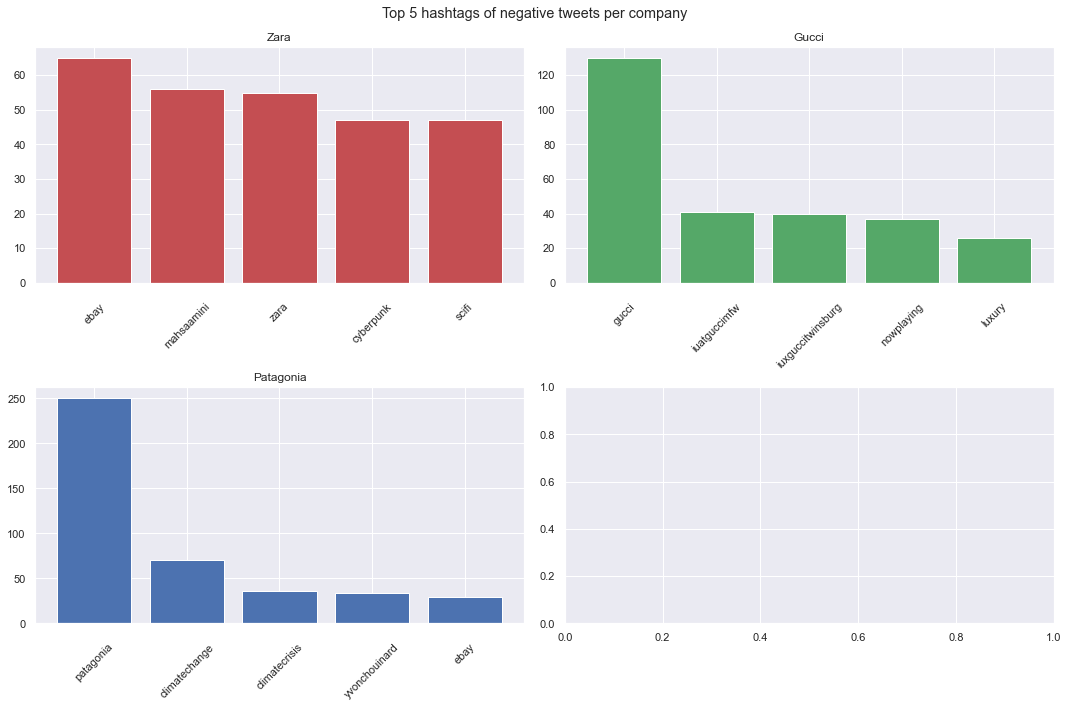

In [215]:
fig, ax = plt.subplots(2, 2,figsize=(15, 10))

plt.suptitle("Top 5 hashtags of negative tweets per company")

# ABSA
ax[0,0].bar(hash_Zara_neg[0].head(), hash_Zara_neg[1].head(), color = "r")
ax[0,0].set_title("Zara")
ax[0,0].xaxis.set_tick_params(rotation=45, size = 15)

ax[0,1].bar(hash_Gucci_neg[0].head(), hash_Gucci_neg[1].head(), color = "g")
ax[0,1].set_title("Gucci")
ax[0,1].xaxis.set_tick_params(rotation=45, size = 15)

ax[1,0].bar(hash_Pata_neg[0].head(), hash_Pata_neg[1].head(), color = "b")
ax[1,0].set_title("Patagonia")
ax[1,0].xaxis.set_tick_params(rotation=45, size = 15)


plt.tight_layout()
plt.show()

In [234]:
Zara_df.columns

Index(['id', 'conversation_id', 'created_at', 'place', 'tweet', 'language',
       'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username', 'name',
       'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'nlikes',
       'nreplies', 'nretweets', 'quote_url', 'search', 'reply_to', 'Company',
       'cleaned_tweet', 'polarity', 'subjectivity', 'Sentiment', 'mean',
       'rolling'],
      dtype='object')

In [235]:
text1 = Zara_df.groupby(['cleaned_tweet'])[['nlikes','nreplies','nretweets','mean']].mean()
text2 = text1.sort_values(by=['nlikes','nretweets'],ascending=False)
text2.head(100)

,nlikes,nreplies,nretweets,mean
cleaned_tweet,,,,
that lady was in french zara stressed,13257.0,8.0,1219.0,0.117584
leighanne pinnock zara larsson and jade thirlwall hanging out together in la last night,10408.0,159.0,638.0,0.083894
princess beatrice princess eugenie lady louise and zara are the first granddaughters in history to take part in a vigil for the late monarch,7875.0,47.0,437.0,0.104596
ps i see a lot of people bash meghan markle for holding hands but not zara princess annes daughter and her husband for doing the same dont tell me your hatred doesnt have anything to do with meghan markle or who she is,6836.0,92.0,418.0,0.107526
zara marketplace would be amazing theres pieces i missed out on that i need,6074.0,17.0,800.0,0.122301
...,...,...,...,...
long answer but the queen was not only the public face of horse racing she worked incredibly hard behind the scenes creating and perfecting bloodlines in all likelihood i expect princess anne or zara to be more active on this front,529.0,5.0,44.0,0.117843
zara is properly crying i cant bear it i just want to give her a hug,514.0,12.0,17.0,0.119245
its an official event therefore working royals only stop stirring the pot andrew beatrice eugenie peter zara louise and james arent there either why mention just those two oh thats right youre on the payroll just stop,511.0,11.0,20.0,0.105257


In [219]:
String_z = " ".join(list(Zara_df_neg["cleaned_tweet"])).lower()
String_g = " ".join(list(Gucci_df_neg["cleaned_tweet"])).lower()
String_p = " ".join(list(Patagonia_df_neg["cleaned_tweet"])).lower()

In [220]:
String_z = re.sub(r"Zara|ZARA|amp","",String_z)
wordcloud_z2 = WordCloud(
                background_color ='white', 
                min_font_size = 5).generate(String_z)

String_g = re.sub(r"Gucci|GUCCI|amp","",String_g)   
wordcloud_g2 = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(String_g)

String_p = re.sub(r"Patagonia|PATAGONIA|amp","",String_p)     
wordcloud_p2 = WordCloud( 
                background_color ='white', 
                min_font_size = 5).generate(String_p)


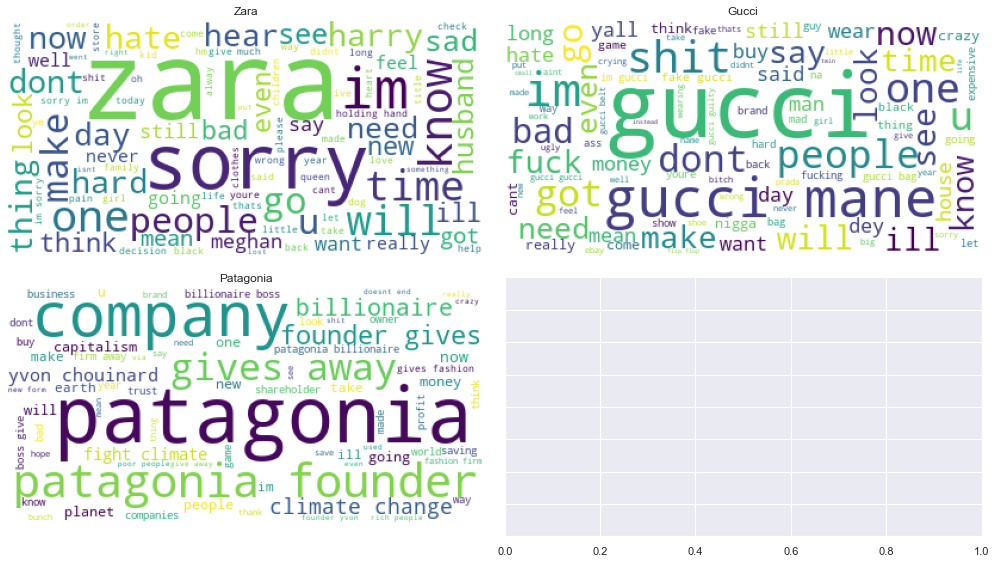

In [221]:
fig, ax = plt.subplots(2,2,figsize=(14, 8),sharey=True)

ax[0,0].imshow(wordcloud_z2)
ax[0,1].imshow(wordcloud_g2)
ax[1,0].imshow(wordcloud_p2)


ax[0,0].axis("off")
ax[0,1].axis("off")
ax[1,0].axis("off")


ax[0,0].set_title("Zara")
ax[0,1].set_title("Gucci")
ax[1,0].set_title("Patagonia")


plt.tight_layout() 
plt.show()

In [244]:
text1 = Zara_df_neg.groupby(['cleaned_tweet'])[['nlikes','nreplies','nretweets','mean']].mean()
text2 = text1.sort_values(by=['nlikes','nretweets'],ascending=False)
text2.head(100)

,nlikes,nreplies,nretweets,mean
cleaned_tweet,,,,
princess beatrice princess eugenie lady louise and zara are the first granddaughters in history to take part in a vigil for the late monarch,7875.0,47.0,437.0,0.125674
poor cant win doesnt go to balmoral shes snubbing the family if shed gone she would of been criticised no partners went or royal women with young children went zara beatrice eugenie give her a bloody break,3815.0,289.0,318.0,0.122190
i see the racists in brexit britain are still mad that prince harry and meghan are holding hands the same racists are ok with zara and her husband holding hands though so whats the difference,2735.0,3.0,431.0,0.116107
record bankruptcy in us victoria secret declared bankruptcy zara closed stores la chapelle withdrew stores chanel is discontinued hermes is discontinued patek philippe discontinued production rolex discontinued production the world,2718.0,107.0,1110.0,0.118260
team behind siima red carpet look outfit styling accessories heels make up hair captured,2429.0,38.0,183.0,0.103951
...,...,...,...,...
racism isnt calling someone a derogatory name or racial attacks anymore its aggression it nitpicking it covert there no reason the media has obsessed with with meghan is doing except to sell hate she done nothing zara and beatrice didnt do with their spouses,93.0,3.0,4.0,0.115002
rna swayama is to yearold zara shirt gays what lwis cpaldi is to grey living room fiat girls,92.0,2.0,5.0,0.126394
a deeply normal man once again shows up to twitter stalk zara sultana get help this obsession is incredibly creepy,92.0,0.0,3.0,0.108520
